# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rehan Athallah Azhar
- **Email:** azharrehan542@gmail.com
- **ID Dicoding:** rehan_azhar

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam 5 bulan terakhir?
- Apa saja 10 produk dengan penjualan terbanyak dalam 5 bulan terakhir, dan bagaimana performa ratingnya?
- Alat pembayaran apa yang paling sering digunakan oleh pelanggan dalam 5 bulan terakhir?
- Bagaimana demografi pelanggan (usia, jenis kelamin, lokasi) yang melakukan pembelian dalam 5 bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [9]:
customers_df = pd.read_csv("./data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [10]:
geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
order_items_df = pd.read_csv("./data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [13]:
order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [14]:
orders_df = pd.read_csv("./data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
product_category_name_translation_df = pd.read_csv("./data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [16]:
products_dataset_df = pd.read_csv("./data/products_dataset.csv")
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [17]:
sellers_dataset_df = pd.read_csv("./data/sellers_dataset.csv")
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Data yg dibutuhkan telah dimuat semua
- Tahap Selanjutnya adalah menilai kualitas data dan membersihkan data jika da yang perlu dibersihkan sebelum melakukan analisis data.

### Assessing Data

#### Menilai Dataset customers_df

In [21]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [22]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [23]:
# check missing and duplicated value for customer dataset
print(customers_df.isnull().sum())
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Jumlah duplikasi:  0


**Insight** : 
- Dataset customers_df terlihat sudah sesuai maka tidak perlu dibersihkan

#### Menilai Data geolocation_df

In [26]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [27]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [28]:
# check missing and duplicated value for geolocation_df
print(geolocation_df.isnull().sum())
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Jumlah duplikasi:  261831


In [29]:
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


**Insight** : 
- Dataset geolocation_df terlihat memiliki 261831 baris yang duplikat. Nantinya baris tersebut akan dihapus

#### Menilai Data order_items_df

In [32]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [33]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [34]:
# check missing and duplicated value for order_items_df
print(order_items_df.isnull().sum())
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Jumlah duplikasi:  0


**Insight** : 
- Pada kolom shipping_limit_date lebih baik bertipe data datetime

#### Menilai Data order_payments_df

In [37]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [38]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [39]:
# check missing and duplicated value for order_payments_df
print(order_payments_df.isnull().sum())
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Jumlah duplikasi:  0


**Insight** : 
- Dataset order_payments_df terlihat sudah sesuai

#### Menilai Data order_reviews_df

In [42]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [43]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [44]:
# check missing and duplicated value for order_payments_df
print(order_reviews_df.isnull().sum())
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Jumlah duplikasi:  0


In [45]:
order_reviews_df[order_reviews_df.isnull().any(axis=1)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


**Insight** : 
- Dataset order_reviews_df memiliki kolom review_comment_title dan  review_comment_message yang banyak memiliki nilai kosong. Nantinya kolom tersebut dihapus karena kita hanya memerlukan data review score dan agar datanya terlihat bersih

#### Menilai Data orders_df

In [48]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [49]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [50]:
# check missing and duplicated value for order_payments_df
print(orders_df.isnull().sum())
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Jumlah duplikasi:  0


**Insight** : 
- Dataset orders_df pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date lebih baik bertipe data datetime.
- Terdapat data yang kosong dengan rincian sebagai berikut:
   - order_approved_at                (160 baris)
   - order_delivered_carrier_date     (1783 baris)
   - order_delivered_customer_date    (2965 baris)

#### Menilai Data order_payments_df

In [53]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [54]:
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [55]:
# check missing and duplicated value for order_payments_df
print(product_category_name_translation_df.isnull().sum())
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())

product_category_name            0
product_category_name_english    0
dtype: int64
Jumlah duplikasi:  0


**Insight** : 
- Dataset product_category_name_translation_df terlihat sudah sesuai

#### Menilai Data products_dataset_df

In [58]:
products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [59]:
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [60]:
# check missing and duplicated value for products_dataset_df
print(products_dataset_df.isnull().sum())
print("Jumlah duplikasi: ", products_dataset_df.duplicated().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Jumlah duplikasi:  0


In [61]:
products_dataset_df[products_dataset_df.isnull().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


**Insight** : 
- Dataset products_dataset_df memiliki data yang kosong dengan rincian pada cell diatas. Nantinya kolom product_category_name yang kosong akan digantikan dengan nilai 'unknown' sedangkan kolom lainnya digantikan dengan nilai median.

#### Menilai Data sellers_dataset_df

In [64]:
sellers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [65]:
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [66]:
# check missing and duplicated value for products_dataset_df
print(sellers_dataset_df.isnull().sum())
print("Jumlah duplikasi: ", sellers_dataset_df.duplicated().sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
Jumlah duplikasi:  0


**Insight:**
- Dataset sellers_dataset_df sudah sesuai

#### Insight Assesing Dataset:

| | Tipe data| Missing value | Duplicate data | Inaccurate value |
| --- | --- | --- | --- | --- |
| customer_df | --- | --- | --- | --- |
| geolocation_df | --- | --- | 261831 baris data | --- |
| order_items_df | shipping_limit_date sebaiknya datetime | --- | --- | --- |
| order_payments_df | --- | --- | --- | --- |
| order_reviews_df | --- | 89385 data pada kolom review_comment_title dan 58247 data pada kolom review_comment_message tidak memiliki nilai | --- | --- |
| orders_df | order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, order_purchase_timestamp, dan order_approved_at sebaiknya memiliki tipe data datetime | 160 data pada kolom order_approved_at, 1783 data pada kolom order_delivered_carrier_date, dan 2965 data pada kolom order_delivered_customer_date tidak bernilai | --- | --- |
| product_category_name_translation_df | --- | --- | --- | --- |
| products_dataset_df | --- | 610 data pada kolom  product_category_name, 610 data pada kolom  product_description_lenght, 610 data pada kolom product_photos_qty, 2 data pada kolom product_weight_g, 2 data pada kolom product_length_cm, 2 data pada kolom product_height_cm, dan 2 data pada kolom product_width_cm tidak bernilai| --- | --- |
| sellers_dataset_df | --- | --- | --- | --- |

### Cleaning Data

In [70]:
# menghapus duplikasi dataset geolocation_df
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [71]:
# mengubah tipe data menjadi datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [72]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [73]:
# menangani dataset order_reviews_df
order_reviews_df[order_reviews_df.isnull().any(axis=1)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


**Insight** : 
- karena kita masih memerlukan data review score, maka hanya kolom judul review dan komen review saja yang dihapus

In [75]:
columns_lst = ['review_comment_title', 'review_comment_message']

for slct_column in columns_lst:
    order_reviews_df.drop(columns=[slct_column], inplace=True)

In [76]:
order_reviews_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [77]:
order_reviews_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [78]:
# menangani dataset orders_df 
# mengubah tipe data menjadi datetime
columns_lst = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in columns_lst:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [79]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [80]:
# mengatasi nilai yang null
orders_df[orders_df.isnull().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [81]:
# menangani missing value
products_dataset_df[products_dataset_df.isnull().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


**Insight** : 
- karena product_category_name, product_name_lenght, product_description_lenght, product_photos_qty tidak bisa kita ganti dengan suatu nilai, maka baris data tersebut saya ganti nilainya menjadi unknown pada kolom product_category_name dan nilai median pada product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_height_cm	dan product_width_cm. karena jika data dihapus, informasi yang dikorbankan cukup banyak sebesar 611 baris data. Sehingga data lebih baik dipertahankan.

In [83]:
# menangani missing value pada products_dataset_df
products_dataset_df['product_category_name'].fillna('Unknown', inplace=True)

columns_lst = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm','product_width_cm']

for column in columns_lst:
    products_dataset_df[column].fillna(products_dataset_df[column].median(), inplace=True)

In [84]:
products_dataset_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- Semua data telah dibersihkan dengan metode yang sesuai. Hal tersebut sudah dijelaskan dari poin-poin insight diatas
- Selanjutnya dataset bisa dilanjutkan ke tahapan EDA

# Exploratory Data Analysis (EDA)

In [87]:
# Mendefinisikan batas waktu dari April 2018 hingga Agustus 2018 (5 bulan)
start_date = pd.to_datetime('2018-04-01')
end_date = pd.to_datetime('2018-08-31')

### Explorasi Data customers_df

In [89]:
cust_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [90]:
last5mo_cust_orders = cust_orders_df[
    (cust_orders_df['order_approved_at'] >= start_date) &
    (cust_orders_df['order_approved_at'] <= end_date)
]

print(last5mo_cust_orders.order_approved_at.min())
print(last5mo_cust_orders.order_approved_at.max())

2018-04-01 00:11:16
2018-08-29 15:10:26


In [91]:
last5mo_cust_orders.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,32804,32804,32804.000000,32804,32804,32804,32804,32804,32804,32534,32224,32804
unique,32804,32294,NaN,2661,27,32804,6,NaN,NaN,NaN,NaN,NaN
top,4e7b3e00288586ebd08712fdd0374a03,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,7,NaN,5839,15080,1,32230,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,33244.700951,NaN,NaN,NaN,NaN,2018-06-13 14:01:02.866693376,2018-06-14 01:08:23.423972608,2018-06-16 05:30:29.770670592,2018-06-23 11:01:18.221604864,2018-07-05 09:24:04.653091328
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2018-03-27 21:39:27,2018-04-01 00:11:16,2018-01-26 13:35:00,2018-04-03 12:22:34,2018-04-12 00:00:00
25%,NaN,NaN,9251.000000,NaN,NaN,NaN,NaN,2018-05-05 13:12:48.750000128,2018-05-05 18:53:43.500000,2018-05-08 13:47:00,2018-05-15 20:03:25.750000128,2018-05-28 00:00:00
50%,NaN,NaN,22410.000000,NaN,NaN,NaN,NaN,2018-06-13 07:54:26,2018-06-13 12:32:34,2018-06-14 19:07:30,2018-06-21 23:07:48,2018-07-13 00:00:00
75%,NaN,NaN,53282.500000,NaN,NaN,NaN,NaN,2018-07-24 18:48:38.500000,2018-07-25 10:25:21.249999872,2018-07-26 19:35:00,2018-08-02 14:51:45,2018-08-10 00:00:00
max,NaN,NaN,99980.000000,NaN,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [92]:
last5mo_cust_orders.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         5839
rio de janeiro    2063
belo horizonte     929
brasilia           754
curitiba           534
                  ... 
jaguaquara           1
jacuizinho           1
jacui                1
jacigua              1
xinguara             1
Name: customer_id, Length: 2661, dtype: int64

In [93]:
last5mo_cust_orders.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    15080
RJ     3848
MG     3631
PR     1659
RS     1620
BA     1088
SC     1081
DF      754
ES      630
GO      614
PE      537
CE      391
MT      278
PA      265
MS      221
MA      192
PB      169
PI      150
RN      139
AL      110
SE      101
TO       88
RO       64
AM       44
AP       21
AC       16
RR       13
Name: customer_id, dtype: int64

In [94]:
customers_df.groupby(by=["customer_state", "customer_city"]).agg({
    "customer_id": "nunique",
}).sort_values(by="customer_id", ascending=False)

customer_id
customer_state customer_city              
SP             sao paulo             15540
RJ             rio de janeiro         6882
MG             belo horizonte         2773
DF             brasilia               2131
PR             curitiba               1521
...                                    ...
RS             cerro grande              1
               cerrito                   1
               caseiros                  1
MG             ipuiuna                   1
AC             brasileia                 1

[4310 rows x 1 columns]

**Insight** :
- 3 negara teratas yang dijangkau oleh e-commerse adalah Sao Paulo, rio de janeiro dan Madagaskar.  
- Sedankgn berdasarkan kotanya, Kota soa paulo di negara Sao Paulo tercatat terdapat 15540 akun id pelanggan dan menduduki peringkat 1
- Kota Rio De Janeiro di negara Rio De Janeiro tercatat memiliki 6882 akun id pelanggan sehingga menduduki peringkat kedua
- Dilanjut Peringkat 3 merupakan kota belo horizonte di negara Madagaskar tercatat terdapat 2773 akun id pelanggan


### Explorasi Data sellers_dataset_df

In [97]:
order_order_items_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

sellers_order_order_items_df = pd.merge(
    left=sellers_dataset_df,
    right=order_order_items_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

last5mo_sellers_orders_order_items = sellers_order_order_items_df[
    (sellers_order_order_items_df['order_approved_at'] >= start_date) &
    (sellers_order_order_items_df['order_approved_at'] <= end_date)
]

print(last5mo_sellers_orders_order_items.order_approved_at.min())
print(last5mo_sellers_orders_order_items.order_approved_at.max())

2018-04-01 00:11:16
2018-08-29 15:10:26


In [98]:
last5mo_sellers_orders_order_items.describe()

,seller_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value
count,37410.000000,37410,37410,37162,36837,37410,37410.000000,37410,37410.000000,37410.000000
mean,23846.187971,2018-06-13 04:00:01.297968384,2018-06-13 15:18:27.613472256,2018-06-15 20:12:31.524137472,2018-06-22 22:44:05.268507392,2018-07-05 02:18:55.140336896,1.196766,2018-06-19 02:33:32.049585664,123.525905,21.054893
min,1001.000000,2018-03-27 21:39:27,2018-04-01 00:11:16,2018-01-26 13:35:00,2018-04-03 12:22:34,2018-04-12 00:00:00,1.000000,2018-04-04 16:35:41,0.850000,0.000000
25%,5849.000000,2018-05-05 02:23:09,2018-05-05 13:50:23.500000,2018-05-08 13:16:15,2018-05-15 17:51:03,2018-05-28 00:00:00,1.000000,2018-05-10 16:53:32.500000,39.990000,12.790000
50%,13405.000000,2018-06-12 13:22:26.500000,2018-06-12 18:46:06,2018-06-14 13:30:30,2018-06-21 16:48:20,2018-07-12 00:00:00,1.000000,2018-06-18 16:36:06,77.900000,18.220000
75%,25645.000000,2018-07-24 13:48:04.249999872,2018-07-25 02:35:15,2018-07-26 14:56:00,2018-08-01 21:41:44,2018-08-10 00:00:00,1.000000,2018-07-30 22:28:55,135.000000,22.950000
max,99730.000000,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,13.000000,2018-09-18 21:10:15,6729.000000,409.680000
std,27344.682407,NaN,NaN,NaN,NaN,NaN,0.661886,NaN,194.200499,18.322723


In [99]:
last5mo_sellers_orders_order_items.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         464
curitiba           85
rio de janeiro     63
ibitinga           41
belo horizonte     38
                 ... 
itirapina           1
itapui              1
itaporanga          1
itapeva             1
xanxere             1
Name: seller_id, Length: 479, dtype: int64

In [100]:
last5mo_sellers_orders_order_items.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1283
PR     235
MG     156
SC     121
RJ     117
RS      86
GO      27
DF      22
ES      18
BA      15
PE       7
CE       7
RN       5
PB       5
MT       4
MS       3
PI       1
MA       1
SE       1
Name: seller_id, dtype: int64

In [101]:
last5mo_sellers_orders_order_items.groupby(by=["seller_state", "seller_city"]).agg({
    "seller_id": "nunique",
}).sort_values(by="seller_id", ascending=False)

seller_id
seller_state seller_city                              
SP           sao paulo                             464
PR           curitiba                               82
RJ           rio de janeiro                         61
SP           ibitinga                               41
             guarulhos                              38
...                                                ...
             avare                                   1
             auriflama/sp                            1
             auriflama                               1
PR           cornelio procopio                       1
BA           arraial d'ajuda (porto seguro)          1

[497 rows x 1 columns]

**Insight** : 
- 3 negara dengan akun id penjual terbanyak adalah Sao Paulo, Puerto Rico dan Madagaskar
- Sedangkan berdasarkan kota, kota sao paulo di negara Sao Paulo yang tercatat sebanyak 694 akun id penjual. Disusul oleh kota Curitiba di negara Puerto Rico yang terdapat 124 akun id penjual. Dan ketiga merupakan kota Rio De Janeiro di negara Rio De Janeiro yang tercatat 93 akun penjual

### Explorasi Data products_dataset_df

In [104]:
last5mo_sellers_products_orders_order_items = pd.merge(
    left=last5mo_sellers_orders_order_items,
    right=products_dataset_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

last5mo_sellers_products_orders_order_items_translate = pd.merge(
    left=last5mo_sellers_products_orders_order_items,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

print(last5mo_sellers_products_orders_order_items_translate.order_approved_at.min())
print(last5mo_sellers_products_orders_order_items_translate.order_approved_at.max())

2018-04-01 00:11:16
2018-08-29 15:10:26


In [105]:
last5mo_sellers_products_orders_order_items_translate.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,37410,37410.000000,37410,37410,37410,37410,37410,37410,37410,37162,...,37410.000000,37410,37410.000000,37410.000000,37410.000000,37410.000000,37410.000000,37410.000000,37410.000000,37170
unique,2114,NaN,479,19,32747,32747,5,NaN,NaN,NaN,...,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
top,6560211a19b47992c3666cc44a7e94c0,NaN,sao paulo,SP,37ee401157a3a0b28c9c6d0ed8c3b24b,7d321bd4e8ba1caf74c4c1aabd9ae524,delivered,NaN,NaN,NaN,...,NaN,beleza_saude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,health_beauty
freq,798,NaN,9675,26908,13,13,36843,NaN,NaN,NaN,...,NaN,3990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3990
mean,NaN,23846.187971,NaN,NaN,NaN,NaN,NaN,2018-06-13 04:00:01.297968384,2018-06-13 15:18:27.613472256,2018-06-15 20:12:31.524137472,...,21.054893,NaN,49.138679,820.592007,2.220155,1963.558621,28.985004,16.163085,22.319353,NaN
min,NaN,1001.000000,NaN,NaN,NaN,NaN,NaN,2018-03-27 21:39:27,2018-04-01 00:11:16,2018-01-26 13:35:00,...,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,9.000000,2.000000,6.000000,NaN
25%,NaN,5849.000000,NaN,NaN,NaN,NaN,NaN,2018-05-05 02:23:09,2018-05-05 13:50:23.500000,2018-05-08 13:16:15,...,12.790000,NaN,43.000000,374.000000,1.000000,267.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,13405.000000,NaN,NaN,NaN,NaN,NaN,2018-06-12 13:22:26.500000,2018-06-12 18:46:06,2018-06-14 13:30:30,...,18.220000,NaN,52.000000,634.000000,1.000000,600.000000,23.000000,13.000000,19.000000,NaN
75%,NaN,25645.000000,NaN,NaN,NaN,NaN,NaN,2018-07-24 13:48:04.249999872,2018-07-25 02:35:15,2018-07-26 14:56:00,...,22.950000,NaN,57.000000,1030.000000,3.000000,1700.000000,35.000000,20.000000,29.000000,NaN
max,NaN,99730.000000,NaN,NaN,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,...,409.680000,NaN,76.000000,3988.000000,19.000000,30000.000000,105.000000,105.000000,105.000000,NaN


In [106]:
pvt_product = last5mo_sellers_products_orders_order_items_translate.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "product_weight_g": ["mean", "min", "max"] ,
    "product_photos_qty": ["min", "max"],
    "product_length_cm": ["min", "max"],
    "product_height_cm": ["min", "max"],
    "product_width_cm": ["min", "max"]
})

pvt_product.sort_values(by=("product_id", "nunique"), ascending=False)

product_id product_weight_g           \
                                     nunique             mean      min   
product_category_name_english                                            
bed_bath_table                          1434      2038.398372      0.0   
health_beauty                           1301       978.016291     50.0   
housewares                              1250      3194.539633     50.0   
sports_leisure                          1143      1440.262581     50.0   
furniture_decor                          983      2721.525765      2.0   
...                                      ...              ...      ...   
la_cuisine                                 1      2450.000000   2450.0   
cds_dvds_musicals                          1       550.000000    550.0   
home_comfort_2                             1       700.000000    700.0   
fashion_childrens_clothes                  1       300.000000    300.0   
furniture_mattress_and_upholstery          1     18250.000000  18250.0   

                                           product_photos_qty        \
                                       max                min   max   
product_category_name_english                                         
bed_bath_table                     30000.0                1.0   9.0   
health_beauty                      30000.0                1.0  10.0   
housewares                         30000.0                1.0  11.0   
sports_leisure                     29750.0                1.0  10.0   
furniture_decor                    30000.0                1.0  11.0   
...                                    ...                ...   ...   
la_cuisine                          2450.0                1.0   1.0   
cds_dvds_musicals                    550.0                2.0   2.0   
home_comfort_2                       700.0                1.0   1.0   
fashion_childrens_clothes            300.0                3.0   3.0   
furniture_mattress_and_upholstery  18250.0                1.0   1.0   

                                  product_length_cm        product_height_cm  \
                                                min    max               min   
product_category_name_english                                                  
bed_bath_table                                 12.0  100.0               2.0   
health_beauty                                  11.0   98.0               2.0   
housewares                                     13.0  104.0               2.0   
sports_leisure                                 15.0  105.0               2.0   
furniture_decor                                11.0  105.0               2.0   
...                                             ...    ...               ...   
la_cuisine                                     81.0   81.0               7.0   
cds_dvds_musicals                              35.0   35.0              15.0   
home_comfort_2                                 65.0   65.0              18.0   
fashion_childrens_clothes                      30.0   30.0              20.0   
furniture_mattress_and_upholstery              25.0   25.0              25.0   

                                         product_width_cm         
                                     max              min    max  
product_category_name_english                                     
bed_bath_table                      71.0              7.0   90.0  
health_beauty                      105.0             11.0   70.0  
housewares                         105.0             11.0   90.0  
sports_leisure                     105.0             10.0   95.0  
furniture_decor                    100.0              8.0  100.0  
...                                  ...              ...    ...  
la_cuisine                           7.0             40.0   40.0  
cds_dvds_musicals                   15.0             25.0   25.0  
home_comfort_2                      18.0             28.0   28.0  
fashion_childrens_clothes           20.0             20.0   20.0  
furniture_

**Insight** : 
- Kategori produk dengan jumlah produk terbanyak adalah bed bath table dengan 1434 produk. Kemudian disusul oleh health beauty dengan 1301 produk. Dan peringkat ketiga adalah housewares dengan 1250 produk.

### Explorasi Data order_items_df

In [109]:
last5mo_sellers_products_orders_order_items_translate.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "freight_value": "mean",
    "price": "sum",
    "product_height_cm": ["min", "max"],
    "product_width_cm": ["min", "max"]
})

product_id freight_value      price  \
                                 nunique          mean        sum   
product_category_name_english                                       
agro_industry_and_commerce            51     29.037436   24074.03   
air_conditioning                      49     27.630879   15095.65   
art                                   24     17.705891   10656.87   
arts_and_craftmanship                 17     15.763636    1662.12   
audio                                 19     16.842705   16773.47   
...                                  ...           ...        ...   
stationery                           377     19.535523   70294.56   
tablets_printing_image                 2     16.460000     151.90   
telephony                            446     16.778361  125726.14   
toys                                 499     20.870551  111611.37   
watches_gifts                        643     16.510856  473376.74   

                              product_height_cm       product_width_cm         
                                            min   max              min    max  
product_category_name_english                                                  
agro_industry_and_commerce                  3.0  63.0             10.0   80.0  
air_conditioning                            5.0  65.0              8.0   54.0  
art                                         4.0  62.0             11.0   50.0  
arts_and_craftmanship                       2.0  25.0             11.0   65.0  
audio                                       4.0  20.0             11.0   30.0  
...                                         ...   ...              ...    ...  
stationery                                  2.0  70.0             11.0   90.0  
tablets_printing_image                     10.0  12.0             21.0   26.0  
telephony                                   2.0  51.0              8.0   30.0  
toys                                        2.0  77.0             11.0  104.0  
watches_gifts                               2.0  35.0              6.0   48.0  

[70 rows x 7 columns]

In [110]:
last5mo_sellers_products_orders_order_items_translate.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price": "sum" ,
}).sort_values(by=("order_id"), ascending=False).head()


,order_id,price
product_category_name_english,,
health_beauty,3610,523354.06
bed_bath_table,2960,332986.60
watches_gifts,2428,473376.74
housewares,2425,289448.31
sports_leisure,2218,280008.34


In [111]:
last5mo_sellers_products_orders_order_items_payments_translate = pd.merge(
    left=last5mo_sellers_products_orders_order_items_translate,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
last5mo_sellers_products_orders_order_items_payments_translate.head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,b908238158de71c7143c6284de581ce1,44c880d8fd29bf9ead60d49adfa11c25,delivered,2018-04-09 23:40:06,2018-04-10 00:49:39,2018-04-10 18:21:45,...,6.0,16850.0,38.0,58.0,25.0,luggage_accessories,1,credit_card,6,436.33
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,ea2c93fbb3cf79edecd5f993fe362464,637b0c3ee412e09ba5e46702af44ebf1,delivered,2018-06-06 20:01:45,2018-06-06 20:15:21,2018-06-07 13:29:00,...,5.0,15500.0,40.0,60.0,25.0,luggage_accessories,1,credit_card,3,457.64
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,02ae2a6d1d1f1432dc743ca4f67033df,d8e392ff4cf70df9743697280315c7de,delivered,2018-07-30 12:20:10,2018-07-30 12:44:49,2018-07-31 08:22:00,...,3.0,400.0,35.0,6.0,26.0,baby,1,credit_card,3,174.21
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,4e7838e2ac3b81d9d9ca377dcc0549de,00914220fb44a373f667e19ed450e8df,delivered,2018-08-03 00:26:04,2018-08-03 00:44:08,2018-08-03 13:02:00,...,10.0,200.0,23.0,7.0,14.0,sports_leisure,1,credit_card,1,95.65
4,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ,34fdc362961364d3ff08986ccff2212d,c2719bf8e555adcf1fa503708bea998c,delivered,2018-05-08 17:40:24,2018-05-08 17:55:23,2018-05-09 11:51:00,...,1.0,150.0,16.0,9.0,11.0,food,1,credit_card,4,257.45


In [112]:
last5mo_sellers_products_orders_order_items_payments_translate.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "price": "mean" ,
})

,order_id,price
payment_type,,
boleto,6057,105.225093
credit_card,25396,128.905823
debit_card,844,133.281394
voucher,1064,106.020093


In [113]:
last5mo_sellers_products_orders_order_items_review_payments_translate = pd.merge(
    left=last5mo_sellers_products_orders_order_items_payments_translate,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

last5mo_all_df = pd.merge(
    left=last5mo_sellers_products_orders_order_items_review_payments_translate,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)


last5mo_all_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,b908238158de71c7143c6284de581ce1,44c880d8fd29bf9ead60d49adfa11c25,delivered,2018-04-09 23:40:06,2018-04-10 00:49:39,2018-04-10 18:21:45,...,6,436.33,78145f0764462bd62521c9ea92da6e9c,5.0,2018-05-01 00:00:00,2018-05-04 23:04:29,177e10134f99776d8a2b0c10c3fed38c,37190,tres pontas,MG
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,ea2c93fbb3cf79edecd5f993fe362464,637b0c3ee412e09ba5e46702af44ebf1,delivered,2018-06-06 20:01:45,2018-06-06 20:15:21,2018-06-07 13:29:00,...,3,457.64,e2b6e9cf487d1388fe4df0b20e9502e7,5.0,2018-06-21 00:00:00,2018-06-21 21:04:29,15dc82b7d6c3e536b3912c307fbfeaf6,62280,santa quiteria,CE
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,02ae2a6d1d1f1432dc743ca4f67033df,d8e392ff4cf70df9743697280315c7de,delivered,2018-07-30 12:20:10,2018-07-30 12:44:49,2018-07-31 08:22:00,...,3,174.21,e218db55097b60f4f6f704945563c3da,5.0,2018-08-04 00:00:00,2018-08-04 17:08:29,6b672d19bb5daf36d2e500d90b753a1e,30310,belo horizonte,MG
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,4e7838e2ac3b81d9d9ca377dcc0549de,00914220fb44a373f667e19ed450e8df,delivered,2018-08-03 00:26:04,2018-08-03 00:44:08,2018-08-03 13:02:00,...,1,95.65,14d2fc00b4a2c4feb60c273b4574258b,5.0,2018-08-09 00:00:00,2018-08-09 21:00:48,a1605a83a0e36258d7eb2da55bb5ff4c,22290,rio de janeiro,RJ
4,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ,34fdc362961364d3ff08986ccff2212d,c2719bf8e555adcf1fa503708bea998c,delivered,2018-05-08 17:40:24,2018-05-08 17:55:23,2018-05-09 11:51:00,...,4,257.45,caf3346205255a0b7b98cff7e15153af,4.0,2018-05-15 00:00:00,2018-05-16 17:08:58,e1708ec558c8c1d8bd5e24d022cd13ce,5705,sao paulo,SP


In [114]:
# Membuat pivot table untuk menghitung jumlah penjualan (order_id) per kategori dan rating
pivot_table = last5mo_all_df.pivot_table(
    index='product_category_name_english',  # Baris adalah kategori produk
    columns='review_score',  # Kolom adalah skor review
    values='order_id',  # Menghitung jumlah order
    aggfunc='nunique',  # Menggunakan fungsi agregasi untuk menghitung jumlah unik
    fill_value=0  # Mengisi nilai kosong dengan 0
)

# Menambahkan kolom untuk total penjualan per kategori
pivot_table['total_sales'] = pivot_table.sum(axis=1)

# Menghitung rata-rata rating untuk setiap kategori produk
average_rating = last5mo_all_df.groupby('product_category_name_english')['review_score'].mean()

# Menambahkan kolom rata-rata rating ke pivot table yang sudah ada
pivot_table['average_rating'] = average_rating

# Mengurutkan pivot table berdasarkan total penjualan
pivot_table_sorted = pivot_table.sort_values(by='total_sales', ascending=False)

print(pivot_table_sorted)


review_score                       1.0  2.0  3.0  4.0   5.0  total_sales  \
product_category_name_english                                              
health_beauty                      298   64  250  644  2333         3589   
bed_bath_table                     307  104  265  572  1687         2935   
watches_gifts                      255   78  221  432  1432         2418   
housewares                         201   68  178  446  1515         2408   
sports_leisure                     179   45  130  395  1463         2212   
...                                ...  ...  ...  ...   ...          ...   
fashion_sport                        0    0    1    0     1            2   
cds_dvds_musicals                    0    0    0    0     1            1   
fashion_childrens_clothes            0    0    0    0     1            1   
la_cuisine                           1    0    0    0     0            1   
furniture_mattress_and_upholstery    0    0    1    0     0            1   

review_scor

In [115]:
pvt_filt = pivot_table[pivot_table['total_sales'] > 1000]

# Mengurutkan pivot table berdasarkan rating dengan penjualan > 1000
pvt_sort_filt = pvt_filt.sort_values(by='average_rating', ascending=False)

print(pvt_sort_filt)


review_score                   1.0  2.0  3.0  4.0   5.0  total_sales  \
product_category_name_english                                          
sports_leisure                 179   45  130  395  1463         2212   
health_beauty                  298   64  250  644  2333         3589   
auto                           144   47  103  326   965         1585   
baby                           105   34   92  190   643         1064   
housewares                     201   68  178  446  1515         2408   
computers_accessories          202   62  144  387  1219         2014   
watches_gifts                  255   78  221  432  1432         2418   
furniture_decor                179   61  150  344  1202         1936   
telephony                      109   42  104  261   635         1151   
bed_bath_table                 307  104  265  572  1687         2935   

review_score                   average_rating  
product_category_name_english                  
sports_leisure                       4.

In [116]:
# Mengurutkan pivot table berdasarkan rating asc dengan penjualan > 1000
pvt_sort_filt = pvt_filt.sort_values(by='average_rating', ascending=True)

print(pvt_sort_filt)

review_score                   1.0  2.0  3.0  4.0   5.0  total_sales  \
product_category_name_english                                          
bed_bath_table                 307  104  265  572  1687         2935   
telephony                      109   42  104  261   635         1151   
furniture_decor                179   61  150  344  1202         1936   
watches_gifts                  255   78  221  432  1432         2418   
computers_accessories          202   62  144  387  1219         2014   
housewares                     201   68  178  446  1515         2408   
baby                           105   34   92  190   643         1064   
auto                           144   47  103  326   965         1585   
health_beauty                  298   64  250  644  2333         3589   
sports_leisure                 179   45  130  395  1463         2212   

review_score                   average_rating  
product_category_name_english                  
bed_bath_table                       4.

In [117]:
five_monthly_orders_ago_df = last5mo_all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by=("order_approved_at"), ascending=False)
five_monthly_orders_ago_df.index = five_monthly_orders_ago_df.index.strftime('%Y-%m')
five_monthly_orders_ago_df = five_monthly_orders_ago_df.reset_index()
five_monthly_orders_ago_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

five_monthly_orders_ago_df

,order_approved_at,order_count,revenue
0,2018-08,6607,909806.29
1,2018-07,6164,908431.56
2,2018-06,6157,914410.56
3,2018-05,7047,1056093.87
4,2018-04,6772,1010481.51


In [118]:
last5mo_all_df.payment_value

0        436.33
1        457.64
2        174.21
3         95.65
4        257.45
          ...  
38806     54.39
38807    219.32
38808     82.46
38809     82.46
38810     49.87
Name: payment_value, Length: 38811, dtype: float64

In [119]:
last5mo_all_df.to_csv("./dashboard/main_data.csv", index=False)

**Insight:**
- 5 kategori produk yang terjual paling banyak adalah health beauty, bed bath table , watches gifts, housewares dan sports leisure
- 5 kategori produk urutan teratas yang memiliki reputasi yang baik dengan minimal penjualan adalah 1000 diantaranya sports leisure, health beauty, auto, baby, dan housewares
- Pelanggan lebih suka menggunakan credit_card ketika melakukan pembayaran
- Jumlah penjualan dalam 5 bulan terakhir berturut-turut dimulai dari april 2018 sampai agustus 2018 adalah 6772, 7047, 6157, 6164, dan 6607

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam 5 bulan terakhir?

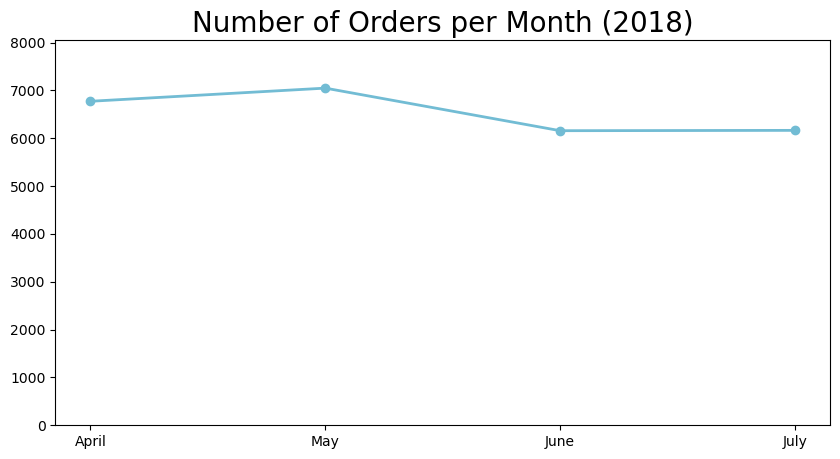

In [123]:
five_monthly_orders_ago_df = last5mo_all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by=("order_approved_at"), ascending=False)[1:6]
five_monthly_orders_ago_df = five_monthly_orders_ago_df.sort_values(by=("order_approved_at"), ascending=True)
five_monthly_orders_ago_df.index = five_monthly_orders_ago_df.index.strftime('%Y-%m')
five_monthly_orders_ago_df = five_monthly_orders_ago_df.reset_index()
five_monthly_orders_ago_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)


# Mengubah index menjadi nama bulan
five_monthly_orders_ago_df['order_approved_at'] = pd.to_datetime(five_monthly_orders_ago_df['order_approved_at']).dt.strftime('%B')

plt.figure(figsize=(10, 5)) 
plt.plot(five_monthly_orders_ago_df["order_approved_at"], five_monthly_orders_ago_df["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20) 

# Menambahkan sumbu y mulai dari 0
plt.ylim(0, five_monthly_orders_ago_df["order_count"].max() + 1000)  # menyesuaikan batas atas sumbu y

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()


### Pertanyaan 2: Apa Saja 10 Produk dengan Penjualan Terbanyak dalam 5 Bulan Terakhir, dan Bagaimana Performa Ratingnya?

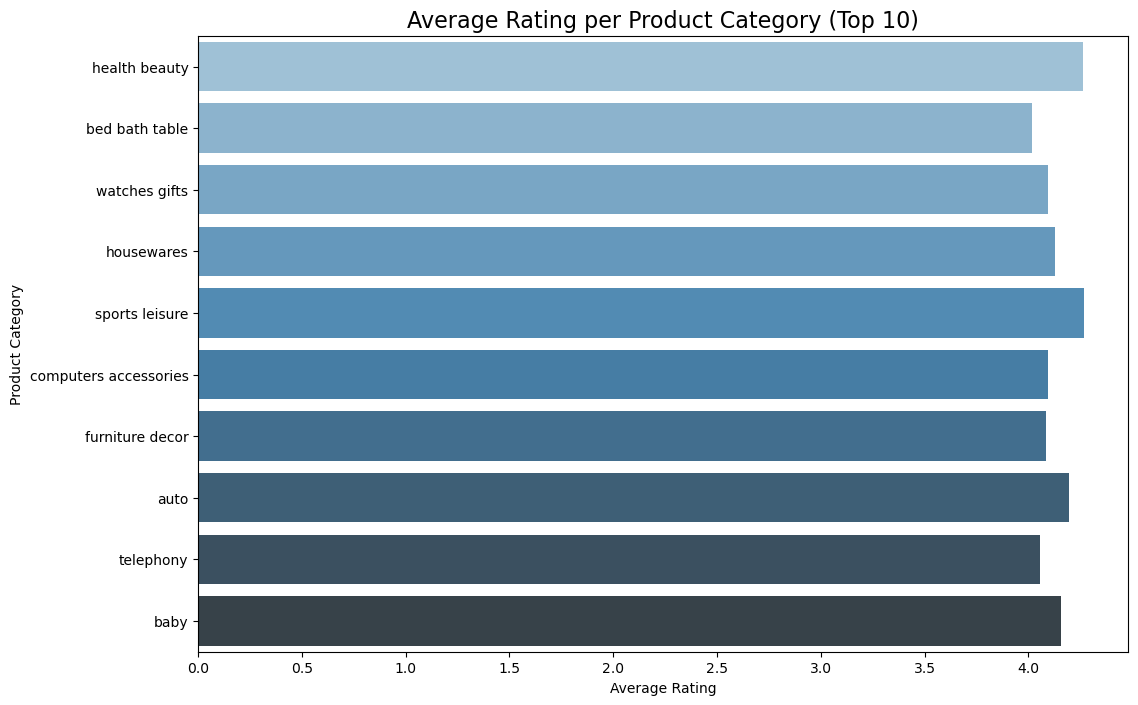

In [125]:
# Membuat pivot table untuk menghitung jumlah penjualan (order_id) per kategori dan rating
pivot_table = last5mo_all_df.pivot_table(
    index='product_category_name_english',  
    columns='review_score', 
    values='order_id', 
    aggfunc='nunique',  
    fill_value=0 
)

pivot_table['total_sales'] = pivot_table.sum(axis=1)

# Menghitung rata-rata rating untuk setiap kategori produk
average_rating = last5mo_all_df.groupby('product_category_name_english')['review_score'].mean()

pivot_table['average_rating'] = average_rating

pivot_table_sorted = pivot_table.sort_values(by='total_sales', ascending=False)

pivot_table_sorted.index = pivot_table_sorted.index.str.replace('_', ' ')

# Membuat visualisasi barplot rata-rata rating terhadap kategori produk
plt.figure(figsize=(12, 8))
top_10_data = pivot_table_sorted.head(10).reset_index()
sns.barplot(x='average_rating', y='product_category_name_english', data=top_10_data, palette="Blues_d")

plt.title('Average Rating per Product Category (Top 10)', fontsize=16)
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.show()

### Pertanyaan 3: Alat pembayaran apa yang sering dipakai oleh pelanggan?

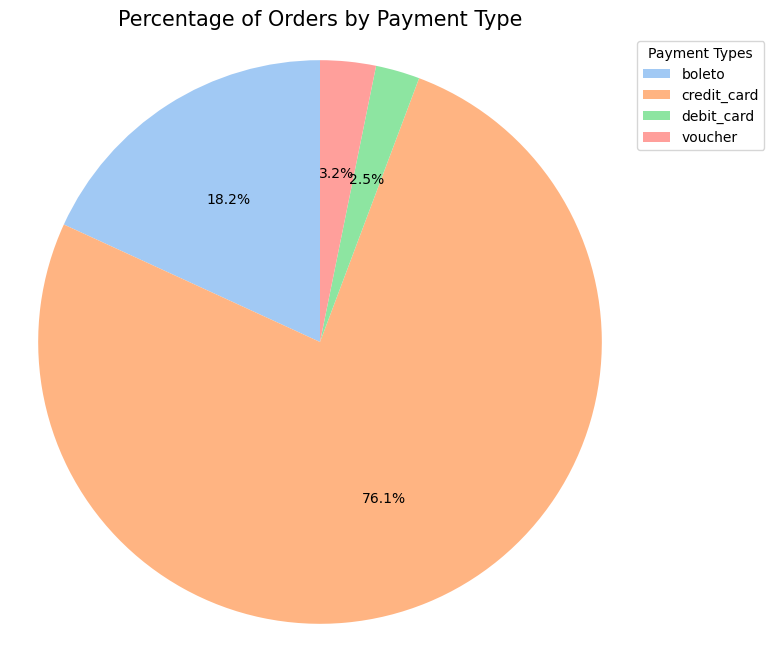

In [127]:
# Mengelompokkan data berdasarkan 'payment_type'
grouped_data = last5mo_all_df.groupby(by="payment_type").agg({
    "order_id": "nunique",  # Jumlah unik order
    "price": "mean"  # Rata-rata harga
})

# Mengambil data untuk pie chart
labels = grouped_data.index  # Label dari payment_type
sizes = grouped_data["order_id"]  # Menggunakan jumlah unik order_id sebagai ukuran segmen

# Membuat pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")  # Menggunakan palet warna pastel dari Seaborn
wedges, texts, autotexts = plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90, colors=colors)

# Menambahkan legend
plt.legend(wedges, labels, title="Payment Types", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Memastikan pie chart dalam bentuk lingkaran sempurna
plt.axis('equal')
plt.title("Percentage of Orders by Payment Type", fontsize=15)
plt.show()

### Pertanyaan 4: Bagaimana demografi pelanggan dan penjual yang kita miliki?

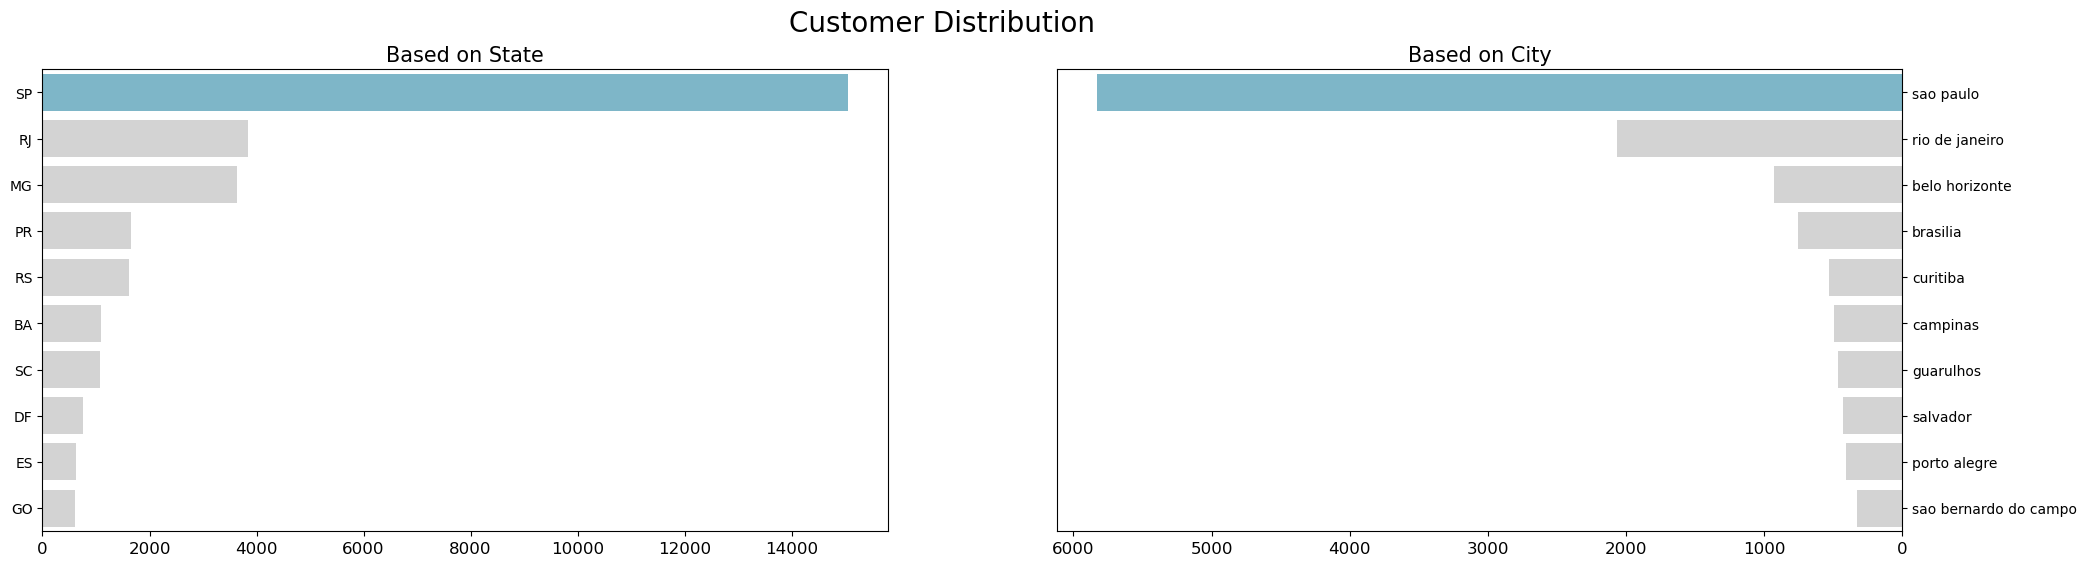

In [129]:
# customer by state
disp_cust_by_state = last5mo_all_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
}).sort_values(by="customer_id", ascending=False)

disp_cust_by_state.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

# customer by city
disp_cust_by_city = last5mo_all_df.groupby(by="customer_city").agg({
    "customer_id": "nunique",
}).sort_values(by="customer_id", ascending=False)

disp_cust_by_city.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3"]

# Bar horizontal untuk customer by state
sns.barplot(y="customer_state", x="customer_count", data=disp_cust_by_state.head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Based on State", loc="center", fontsize=15)
ax[0].tick_params(axis ='x', labelsize=12)

# Bar horizontal untuk customer by city
sns.barplot(y="customer_city", x="customer_count", data=disp_cust_by_city.head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()  # Membalikkan sumbu x
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Based on City", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=12)

plt.suptitle("Customer Distribution", fontsize=20)
plt.show()

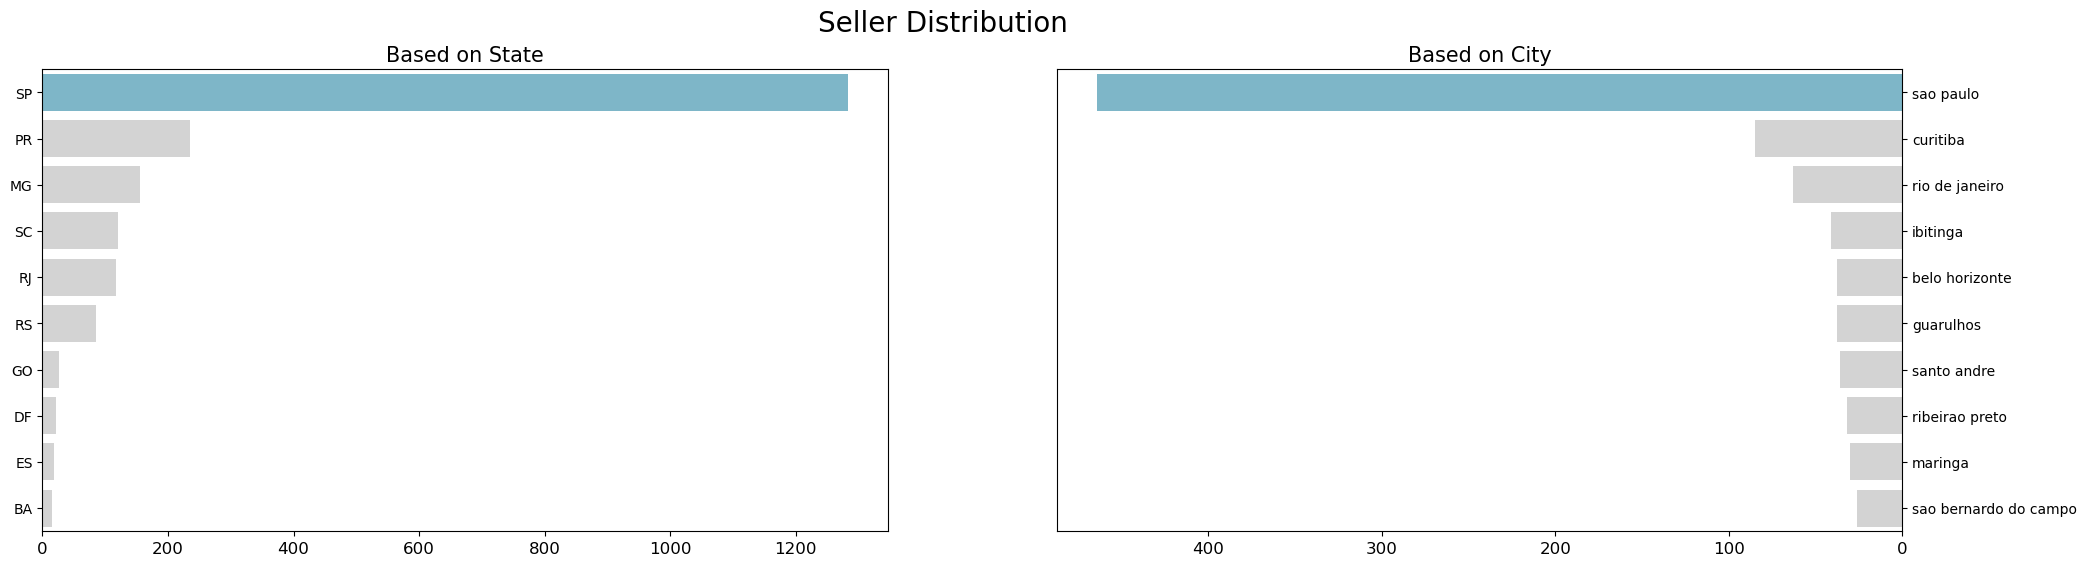

In [130]:
# seller by state
disp_seller_by_state = last5mo_all_df.groupby(by="seller_state").agg({
    "seller_id": "nunique",
}).sort_values(by="seller_id", ascending=False)

disp_seller_by_state.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)

# seller by city
disp_seller_by_city = last5mo_all_df.groupby(by="seller_city").agg({
    "seller_id": "nunique",
}).sort_values(by="seller_id", ascending=False)

disp_seller_by_city.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3"]

# Bar horizontal untuk Best Performing Product
sns.barplot(y="seller_state", x="seller_count", data=disp_seller_by_state.head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Based on State", loc="center", fontsize=15)
ax[0].tick_params(axis ='x', labelsize=12)

# Bar horizontal untuk Worst Performing Product
sns.barplot(y="seller_city", x="seller_count", data=disp_seller_by_city.head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()  # Membalikkan sumbu x
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Based on City", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=12)

plt.suptitle("Seller Distribution", fontsize=20)
plt.show()

## RFM Analysis

In [132]:
# Convert the 'order_purchase_timestamp' to datetime format
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Filter for only delivered orders
delivered_orders = orders_df[orders_df['order_status'] == 'delivered']

# Merge order items to get price information
order_items_merged = pd.merge(delivered_orders, order_items_df[['order_id', 'price']], on='order_id')

# Merge with order payments to get the total payment value
order_payments_merged = pd.merge(order_items_merged, order_payments_df[['order_id', 'payment_value']], on='order_id')

# Group by customer to calculate RFM metrics
rfm_df = order_payments_merged.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  
    "order_id": "nunique",               
    "payment_value": "sum"               
})

# Rename the columns to match RFM
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Calculate recency (days since last transaction)
recent_date = orders_df['order_purchase_timestamp'].max().date()
rfm_df["recency"] = rfm_df["max_order_timestamp"].dt.date.apply(lambda x: (recent_date - x).days)

# Drop the max_order_timestamp column
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

# Display the first few rows of the resulting RFM dataframe
rfm_df.head()


,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
1,000161a058600d5901f007fab4c27140,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,1,107.01,198


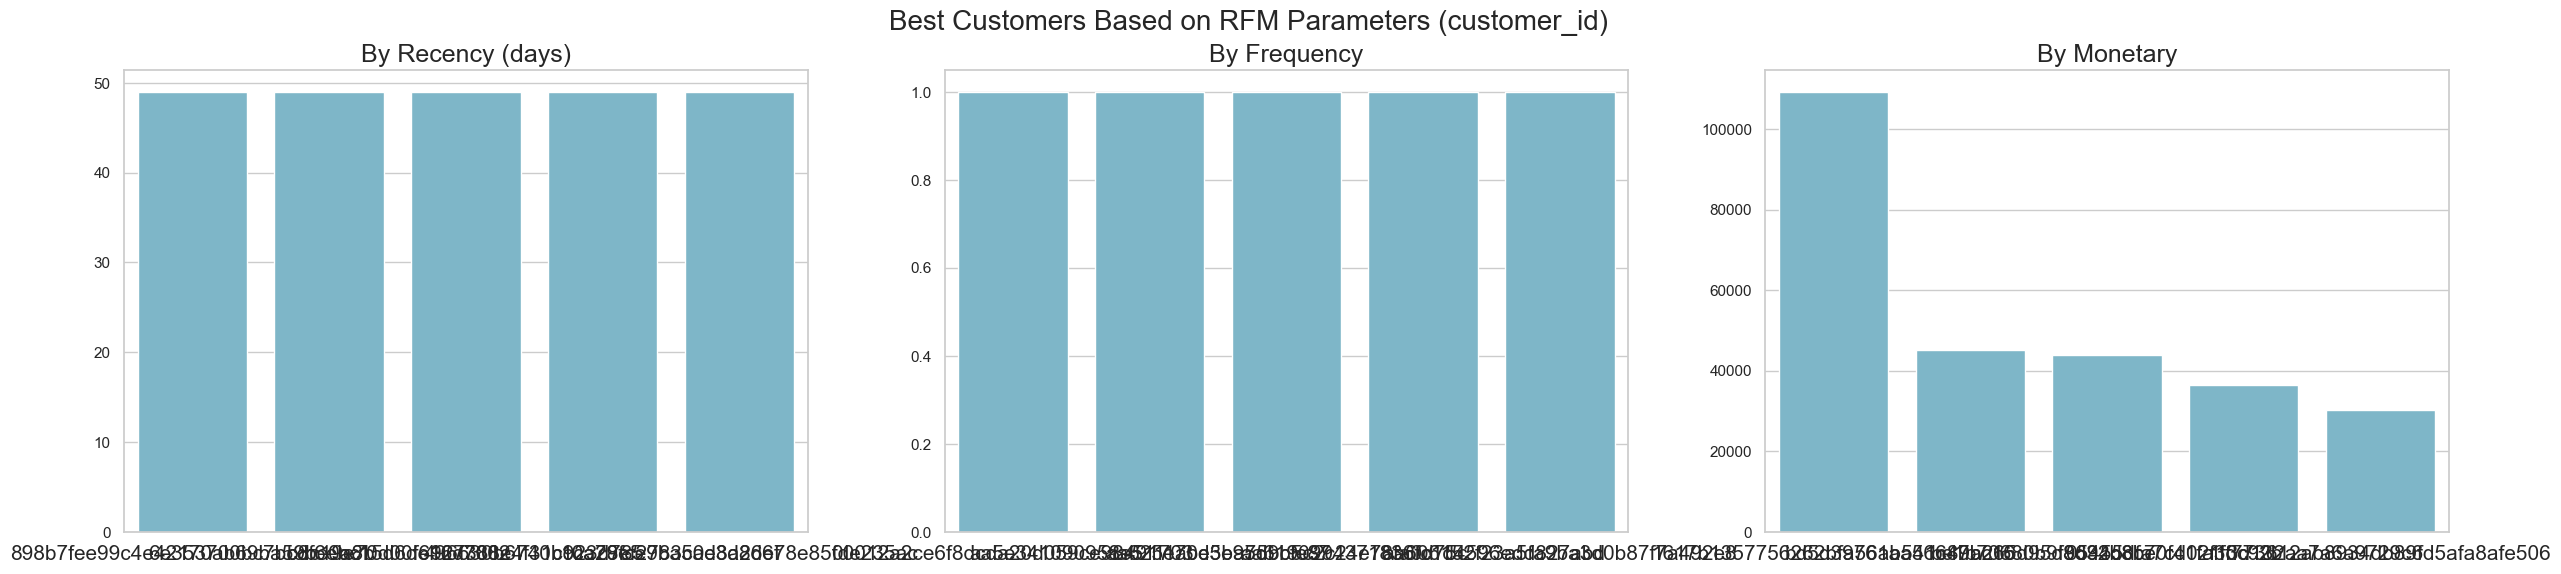

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a subplot with 1 row and 3 columns
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Define a color palette
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Plotting Recency
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Plotting Frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Plotting Monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Set a main title for the entire figure
plt.suptitle("Best Customers Based on RFM Parameters (customer_id)", fontsize=20)

# Show the plots
plt.show()


**Insight:**

Berdasarkan hasil RFM (Recency, Frequency, Monetary) analysis yang telah Anda lakukan, berikut kesimpulan singkat:

1) Recency:

    rata-rata pelanggan E-Commerce melakukan pembelian terakhir sekitar 50 hari yang lalu

2) Frequency:

    Sebagian besar pelanggan memiliki frekuensi pembelian yang rendah, yaitu hanya 1 kali pembelian. Ini menunjukkan bahwa mayoritas pelanggan melakukan pembelian tunggal, atau tidak sering melakukan transaksi berulang.

3) Monetary:

    Nilai monetari (total pengeluaran) dari pelanggan bervariasi, mulai dari Rp20.000 hingga Rp110.000, tergantung pada jumlah yang dihabiskan selama transaksi.

## Analisis Lanjutan (Opsional)

### Analisis Strategi
- **Pelanggan yang Berharga tetapi Tidak Aktif**: Mereka yang dulu sering berbelanja tapi sekarang jarang. Mereka perlu diingatkan.
- **Pelanggan yang Sering Tapi Tidak Menghabiskan Banyak**: Mereka perlu ditawari produk tambahan atau paket bundling.
- **Pelanggan yang Jarang Tapi Menghabiskan Banyak**: Kita perlu mencari cara agar mereka berbelanja lebih sering.

## Conclusion

Berdasarkan hasil analisis data ynag sudah dilakukan sebelumnya, berikut kesimpulan dalam bentuk poin-poin singkat:

1) Performa Penjualan dan Revenue:

Data transaksi selama beberapa bulan terakhir menunjukkan skestabilan dimana naik dan turun tidak terlalu jauh dari rata-rata per bulannya. 

2) 10 Produk dengan Penjualan Terbanyak:

Berikut 10 kategori produk yang sering dibeli secara berurutan dari yang paling banyak hingga sedikit diantaranya health beauty, bed bath table, watches gifts, housewares, sport leaisure, computers accessories, furniture decor, auto, telephony dan baby

3) Metode Pembayaran Paling Sering Digunakan:

Pembayaran menggunakan kartu kredit (credit_card) adalah metode yang paling sering digunakan oleh pelanggan, berdasarkan jumlah transaksi dengan metode ini. Hal ini ditujuukan pada grafik diatas yang mampus menjangkau 76.1 % dari total semua pelanggan.

4) Demografi Pelanggan dan Penjual:

Sebagian besar pelanggan berasal dari kota besar seperti Sao Paulo. Disusul oleh Rio De Janeiro  dan belo horizonte. Sedangkan demografi penjual sebagian besar berada di Sao Paulo, Curitiba dan Rio De Janeiro